In [2]:
#Read files
import pandas as pd
covid_data = pd.read_csv('dataset/covid_19_data.csv')
covid_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [3]:
geo_id = covid_data['geoId'].unique()
print(geo_id)

['AF' 'AL' 'DZ' 'AD' 'AO' 'AI' 'AG' 'AR' 'AM' 'AW' 'AU' 'AT' 'AZ' 'BS'
 'BH' 'BD' 'BB' 'BY' 'BE' 'BZ' 'BJ' 'BM' 'BT' 'BO' 'BQ' 'BA' 'BW' 'BR'
 'VG' 'BN' 'BG' 'BF' 'BI' 'KH' 'CM' 'CA' 'CV' 'JPG11668' 'KY' 'CF' 'TD'
 'CL' 'CN' 'CO' 'KM' 'CG' 'CR' 'CI' 'HR' 'CU' 'CW' 'CY' 'CZ' 'CD' 'DK'
 'DJ' 'DM' 'DO' 'EC' 'EG' 'SV' 'GQ' 'ER' 'EE' 'SZ' 'ET' 'FK' 'FO' 'FJ'
 'FI' 'FR' 'PF' 'GA' 'GM' 'GE' 'DE' 'GH' 'GI' 'EL' 'GL' 'GD' 'GU' 'GT'
 'GG' 'GN' 'GW' 'GY' 'HT' 'VA' 'HN' 'HU' 'IS' 'IN' 'ID' 'IR' 'IQ' 'IE'
 'IM' 'IL' 'IT' 'JM' 'JP' 'JE' 'JO' 'KZ' 'KE' 'XK' 'KW' 'KG' 'LA' 'LV'
 'LB' 'LS' 'LR' 'LY' 'LI' 'LT' 'LU' 'MG' 'MW' 'MY' 'MV' 'ML' 'MT' 'MH'
 'MR' 'MU' 'MX' 'MD' 'MC' 'MN' 'ME' 'MS' 'MA' 'MZ' 'MM' nan 'NP' 'NL' 'NC'
 'NZ' 'NI' 'NE' 'NG' 'MK' 'MP' 'NO' 'OM' 'PK' 'PS' 'PA' 'PG' 'PY' 'PE'
 'PH' 'PL' 'PT' 'PR' 'QA' 'RO' 'RU' 'RW' 'KN' 'LC' 'VC' 'SM' 'ST' 'SA'
 'SN' 'RS' 'SC' 'SL' 'SG' 'SX' 'SK' 'SI' 'SB' 'SO' 'ZA' 'KR' 'SS' 'ES'
 'LK' 'SD' 'SR' 'SE' 'CH' 'SY' 'TW' 'TJ' 'TH' 'TL' 'TG' 'TT' 'TN' 'TR'
 

In [4]:
#Reading weather sets
weather_de_july = pd.read_csv('dataset/de_july_2020_weather.csv')
weather_de_dec = pd.read_csv('dataset/de_dec_2020_weather.csv')

weather_ir_june = pd.read_csv('dataset/irn_june_2020_weather.csv')
weather_ir_nov = pd.read_csv('dataset/irn_nov_2020_weather.csv')

In [5]:
#Data processing
germany = covid_data[covid_data['geoId'] == 'DE']
iran = covid_data[covid_data['geoId'] == 'IR']

#germany data sorting for winter
germany_2020 = germany[germany['year'] == 2020]
germany_2020 = germany_2020[germany_2020['month'] == 12]

#germany data sorting for summer
germany_2020_summer = germany[germany['year'] == 2020]
germany_2020_summer = germany_2020_summer[germany_2020_summer['month'] == 7]
germany_2020_summer = germany_2020_summer[germany_2020_summer['day'] >= 18]

#iran data sorting for winter
iran_2020 = iran[iran['year'] == 2020]
iran_2020 = iran_2020[iran_2020['month'] == 11]
iran_2020 = iran_2020[iran_2020['day'] >= 17]

#iran data sorting for summer
iran_2020_summer = iran[iran['year'] == 2020]
iran_2020_summer = iran_2020_summer[iran_2020_summer['month'] == 6]
iran_2020_summer = iran_2020_summer[iran_2020_summer['day'] <= 14]

#sorting by column
germany_2020_sorted = germany_2020.sort_values(by='day')
germany_2020_summer_sorted = germany_2020_summer.sort_values(by='day')
iran_2020_sorted = iran_2020.sort_values(by='day') #summer
iran_2020_summer_sorted = iran_2020_summer.sort_values(by='day') #winter



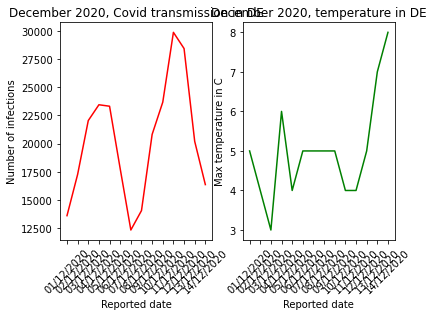

In [6]:
#Plot
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2)
plt.rcParams['figure.figsize'] = [21, 23]
ax1.plot(germany_2020_sorted['dateRep'], germany_2020_sorted['cases'], c='red')
ax1.set(xlabel='Reported date', ylabel='Number of infections',title='December 2020, Covid transmission in DE')
ax2.plot(weather_de_dec['dateRep'], weather_de_dec['maxTemp'], c='green')
ax2.set(xlabel='Reported date', ylabel='Max temperature in C', title='December 2020, temperature in DE' )
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.show()

In [7]:
#Correlation test
from scipy import stats
R_germany_december = stats.spearmanr(germany_2020_sorted['cases'], weather_de_dec['maxTemp']).correlation
print('Correlation between COVID-10 transmission and temperature during wintertime in Germany is', round(R_germany_december, 4))

#Correlation test for summertime
R_germany_june = stats.spearmanr(germany_2020_summer_sorted['cases'], weather_de_july['maxTemp']).correlation
print('Correlation between COVID-10 transmission and temperature during summertime in Germany is', round(R_germany_june, 4))

#Correlation test for IR for wintertime
R_iran_ = stats.spearmanr(germany_2020_summer_sorted['cases'], weather_de_july['maxTemp']).correlation
print('Correlation between COVID-10 transmission and temperature during summertime in Germany is', round(R_germany_june, 4))

#Correlation test for IR for summertime
R_Iran_june = stats.spearmanr(germany_2020_summer_sorted['cases'], weather_de_july['maxTemp']).correlation
print('Correlation between COVID-10 transmission and temperature during summertime in Germany is', round(R_germany_june, 4))

Correlation between COVID-10 transmission and temperature during wintertime in Germany is -0.3496
Correlation between COVID-10 transmission and temperature during summertime in Germany is -0.7311
Correlation between COVID-10 transmission and temperature during summertime in Germany is -0.7311
Correlation between COVID-10 transmission and temperature during summertime in Germany is -0.7311


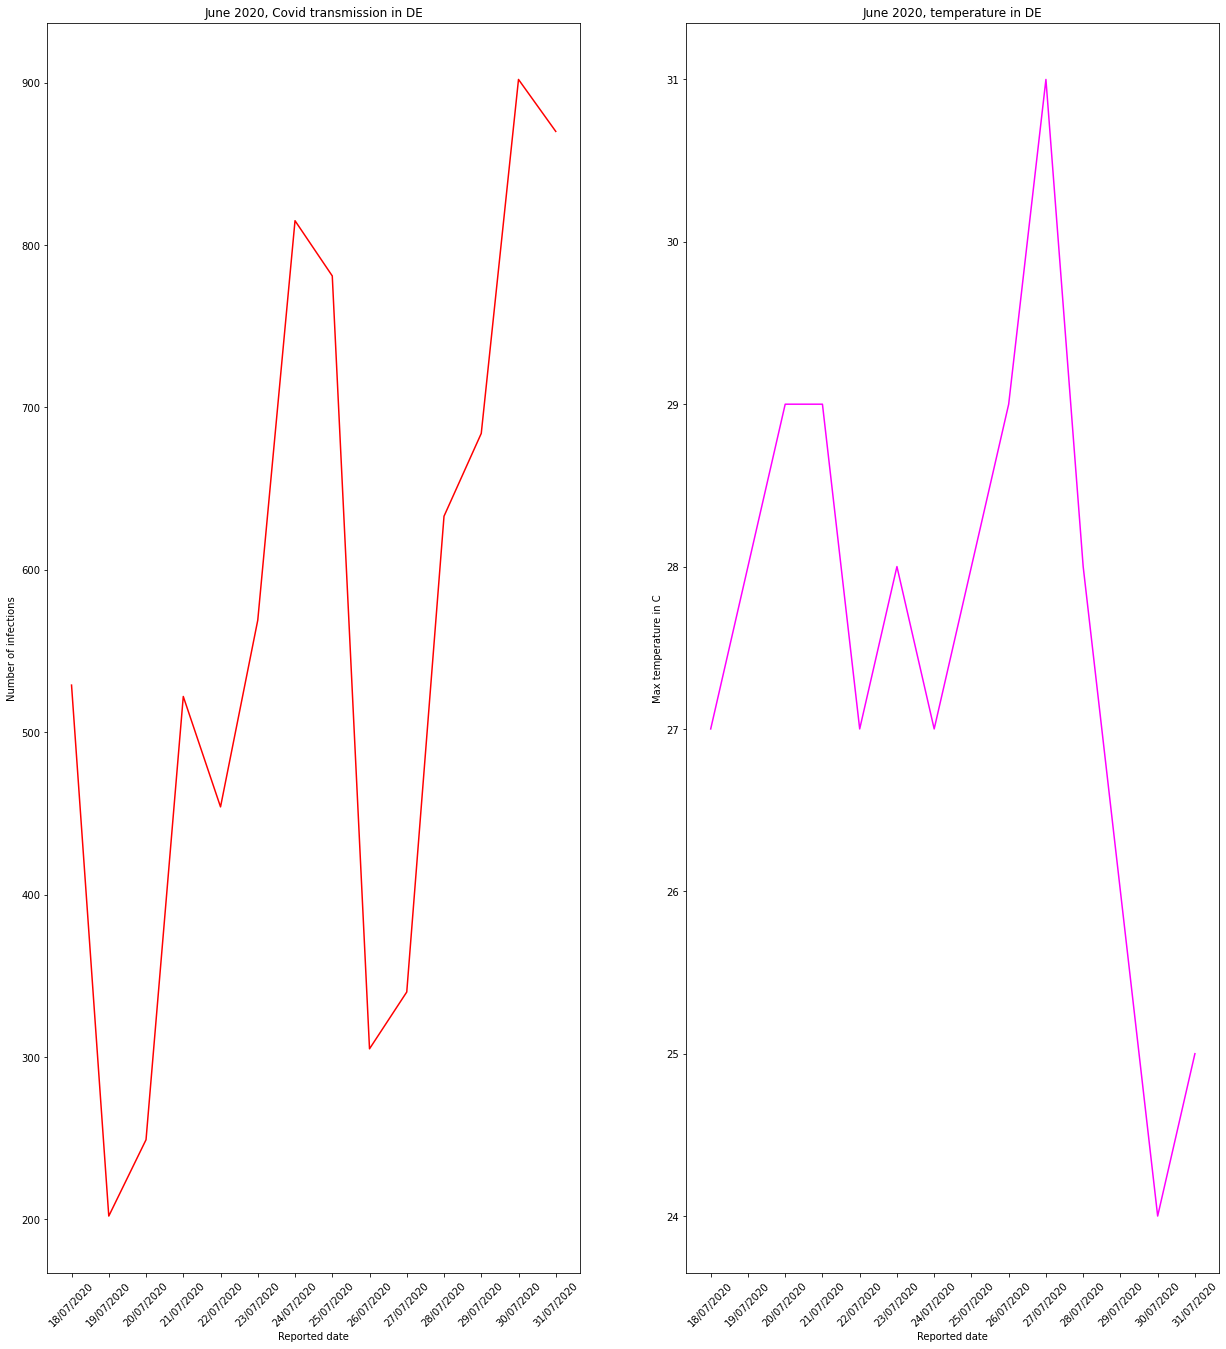

In [8]:
#Plot
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2)
plt.rcParams['figure.figsize'] = [21, 23]
ax1.plot(germany_2020_summer_sorted['dateRep'], germany_2020_summer_sorted['cases'], c='red')
ax1.set(xlabel='Reported date', ylabel='Number of infections',title='June 2020, Covid transmission in DE')
ax2.plot(weather_de_july['dateRep'], weather_de_july['maxTemp'], c='magenta')
ax2.set(xlabel='Reported date', ylabel='Max temperature in C', title='June 2020, temperature in DE' )
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.show()

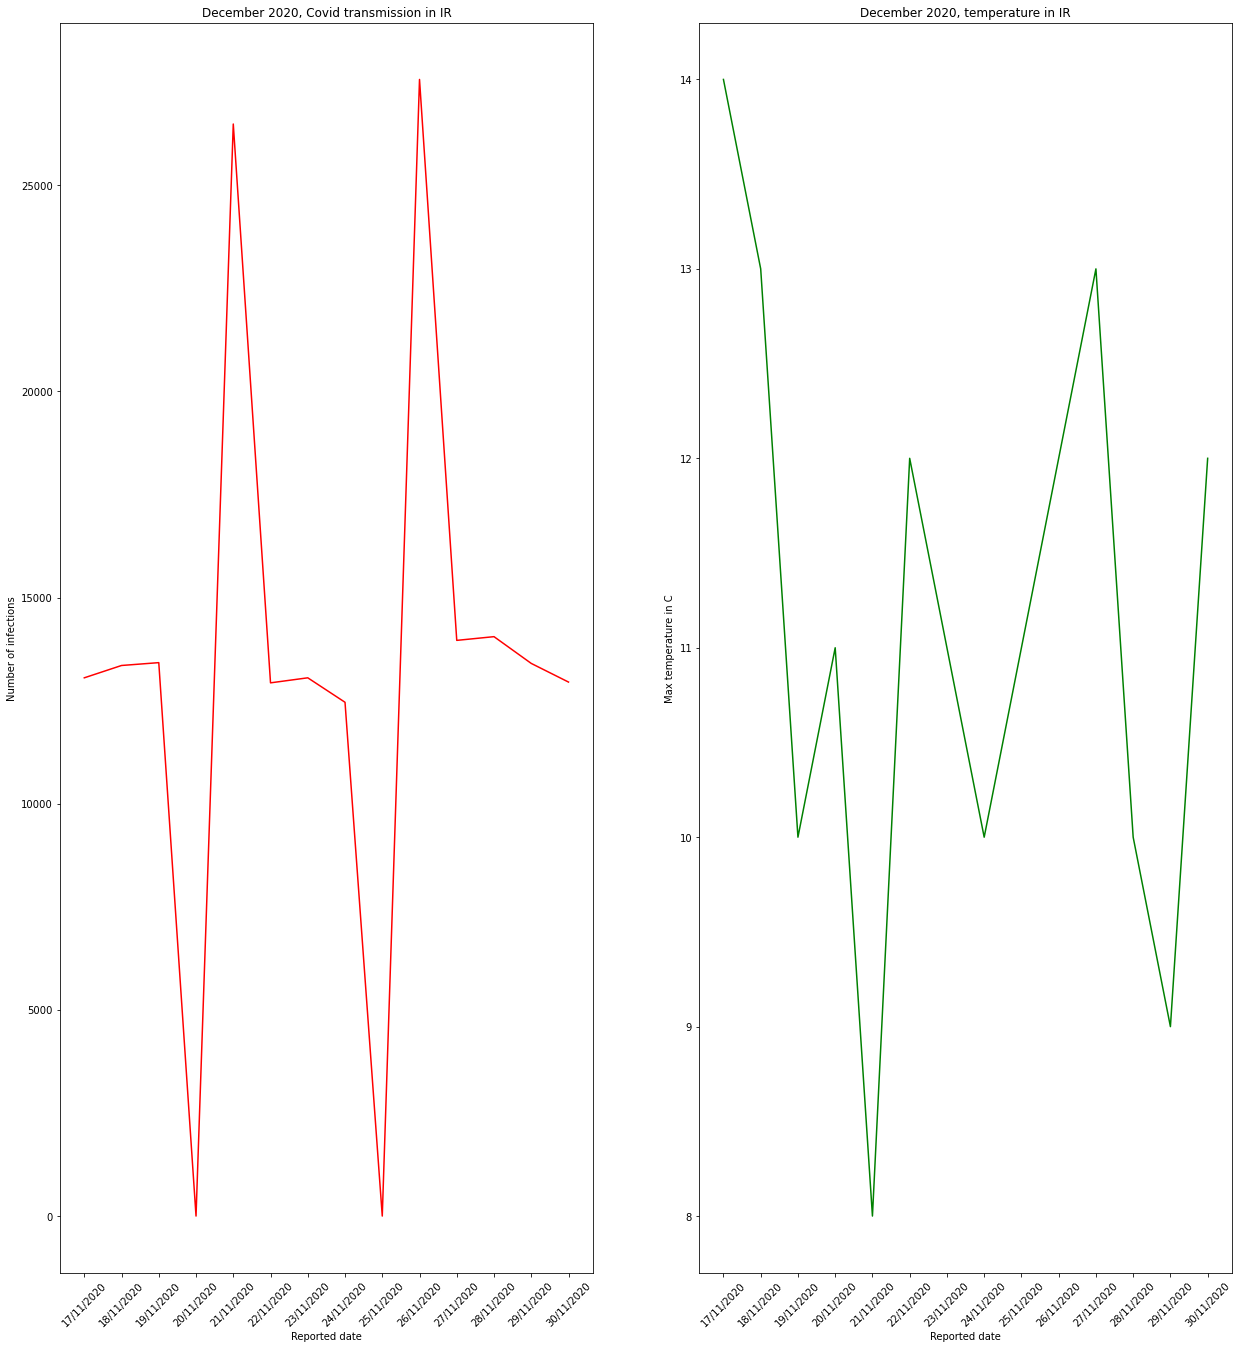

In [9]:
#Plot
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2)
plt.rcParams['figure.figsize'] = [21, 23]
ax1.plot(iran_2020_sorted['dateRep'], iran_2020_sorted['cases'], c='red')
ax1.set(xlabel='Reported date', ylabel='Number of infections',title='December 2020, Covid transmission in IR')
ax2.plot(weather_ir_nov['dateRep'], weather_ir_nov['maxTemp'], c='green')
ax2.set(xlabel='Reported date', ylabel='Max temperature in C', title='December 2020, temperature in IR' )
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.show()

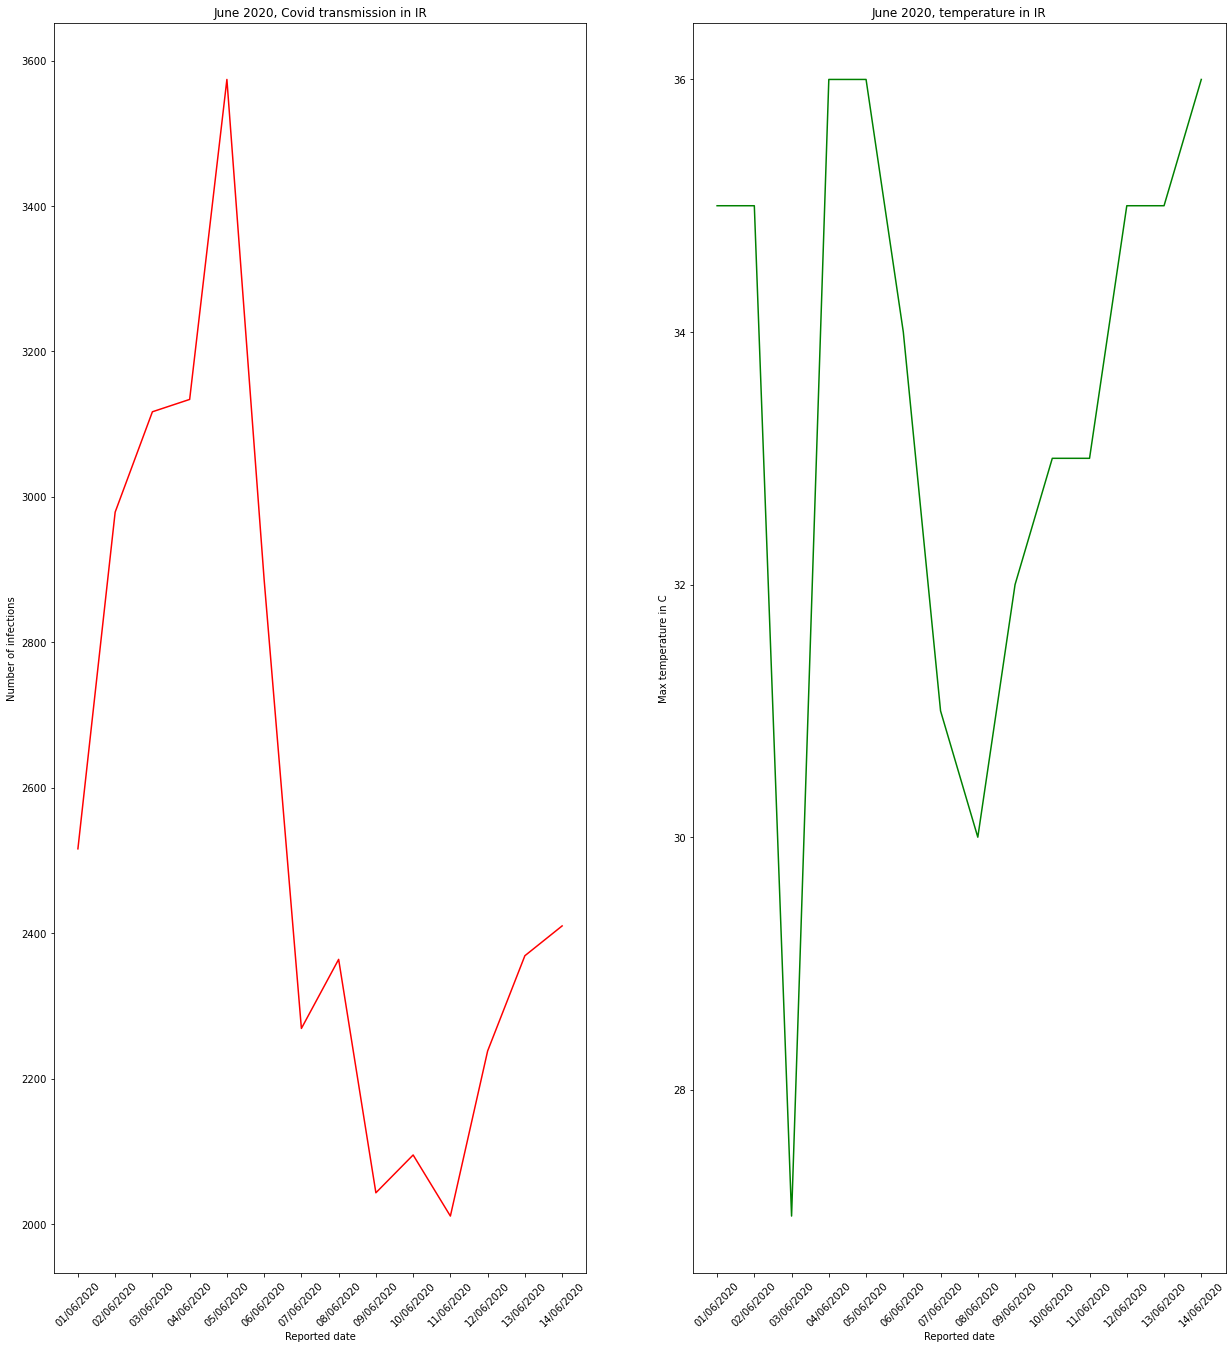

In [10]:
#Plot
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2)
plt.rcParams['figure.figsize'] = [21, 23]
ax1.plot(iran_2020_summer_sorted['dateRep'], iran_2020_summer_sorted['cases'], c='red')
ax1.set(xlabel='Reported date', ylabel='Number of infections',title='June 2020, Covid transmission in IR')
ax2.plot(weather_ir_june['dateRep'], weather_ir_june['maxTemp'], c='green')
ax2.set(xlabel='Reported date', ylabel='Max temperature in C', title='June 2020, temperature in IR' )
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.show()

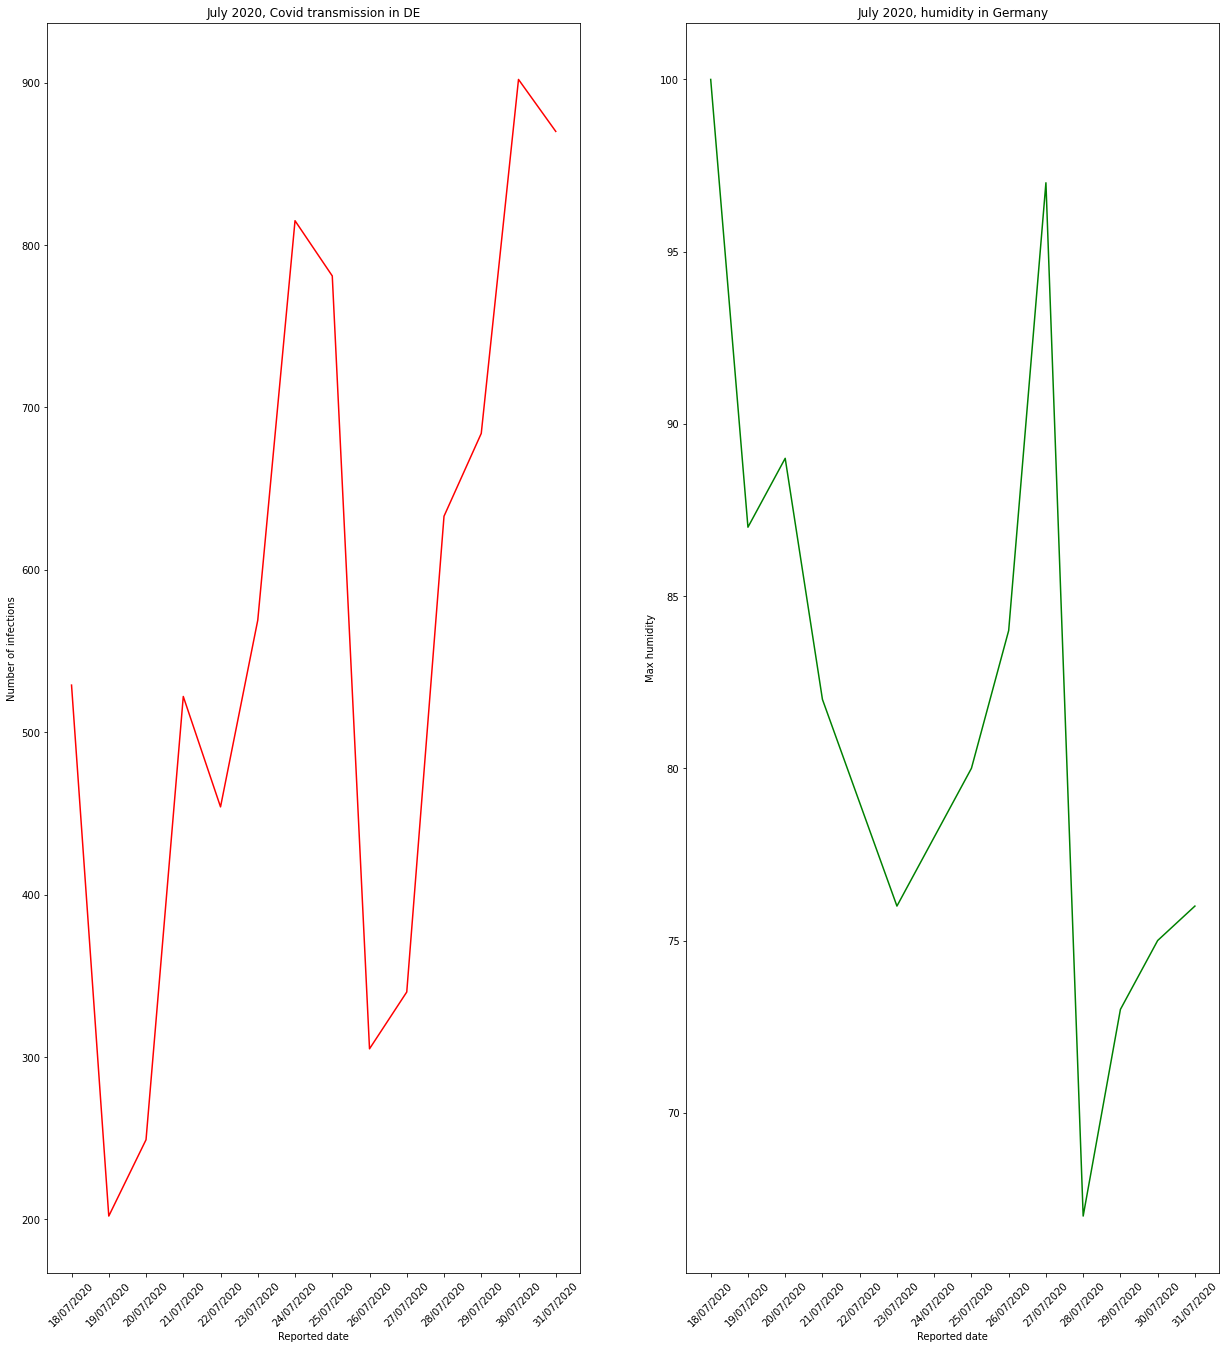

In [11]:
#Plot
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2)
plt.rcParams['figure.figsize'] = [21, 23]
ax1.plot(germany_2020_summer_sorted['dateRep'], germany_2020_summer_sorted['cases'], c='red')
ax1.set(xlabel='Reported date', ylabel='Number of infections',title='July 2020, Covid transmission in DE')
ax2.plot(weather_de_july['dateRep'], weather_de_july['maxHum'], c='green')
ax2.set(xlabel='Reported date', ylabel='Max humidity', title='July 2020, humidity in Germany' )
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.show()

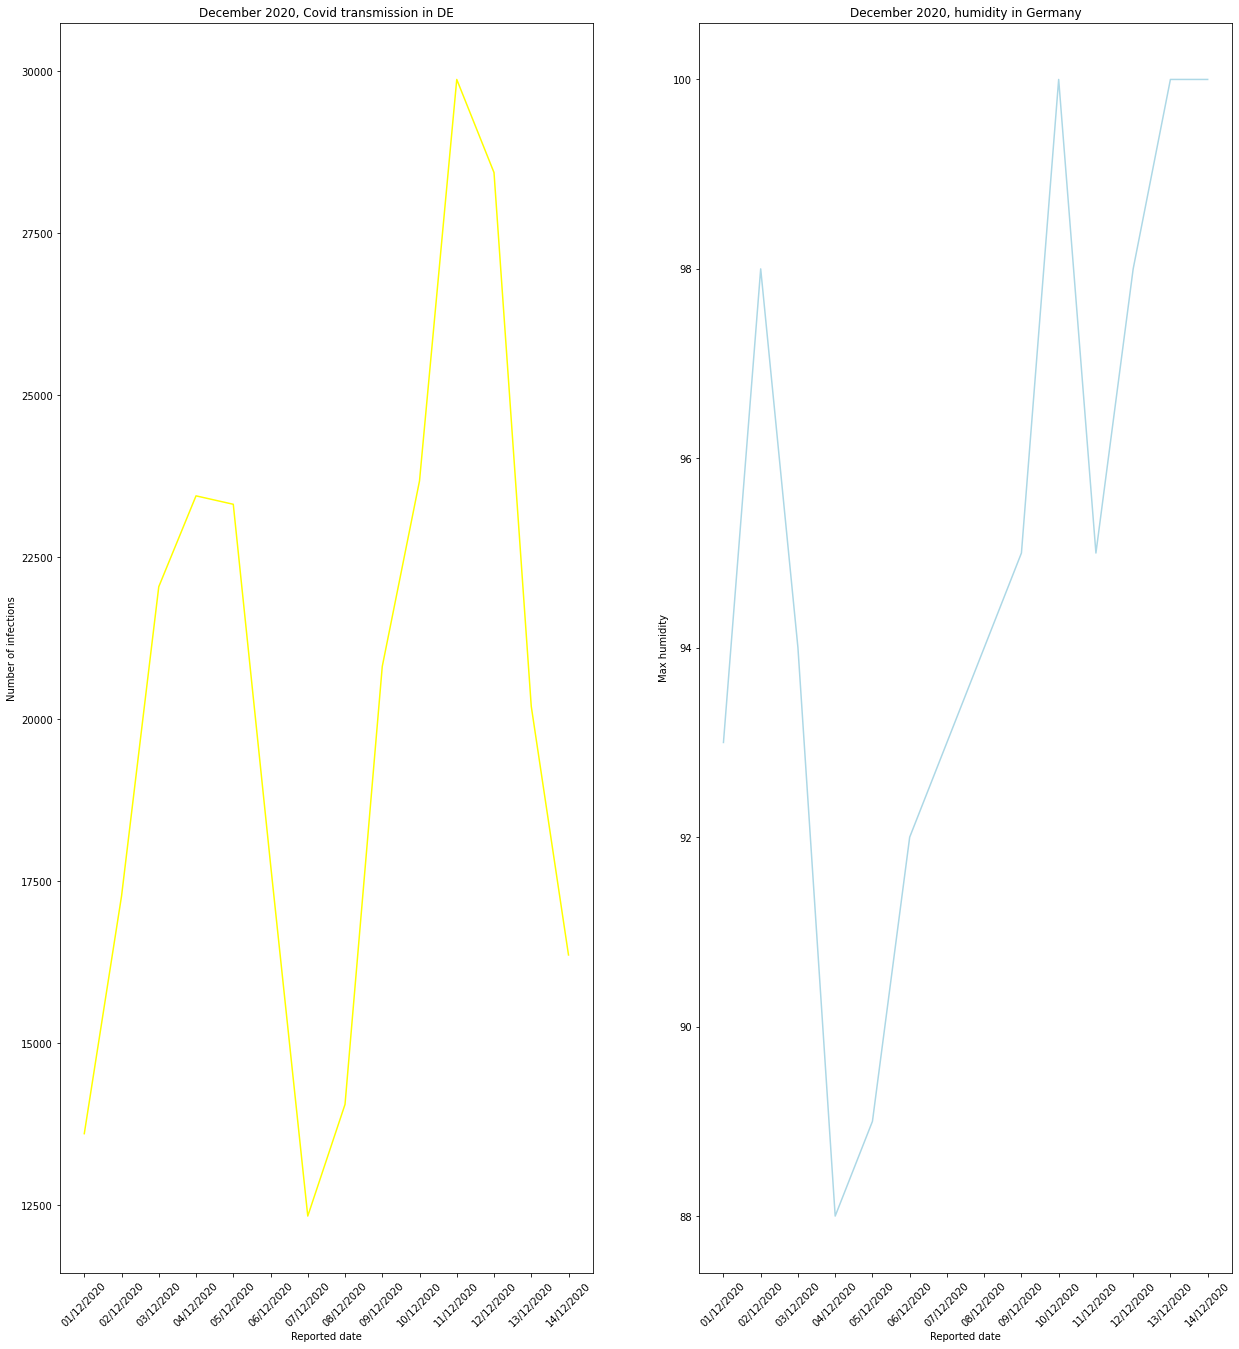

In [12]:
#Plot
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2)
plt.rcParams['figure.figsize'] = [21, 23]
ax1.plot(germany_2020_sorted['dateRep'], germany_2020_sorted['cases'], c='yellow')
ax1.set(xlabel='Reported date', ylabel='Number of infections',title='December 2020, Covid transmission in DE')
ax2.plot(weather_de_dec['dateRep'], weather_de_dec['maxHum'], c='lightblue')
ax2.set(xlabel='Reported date', ylabel='Max humidity', title='December 2020, humidity in Germany' )
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.show()

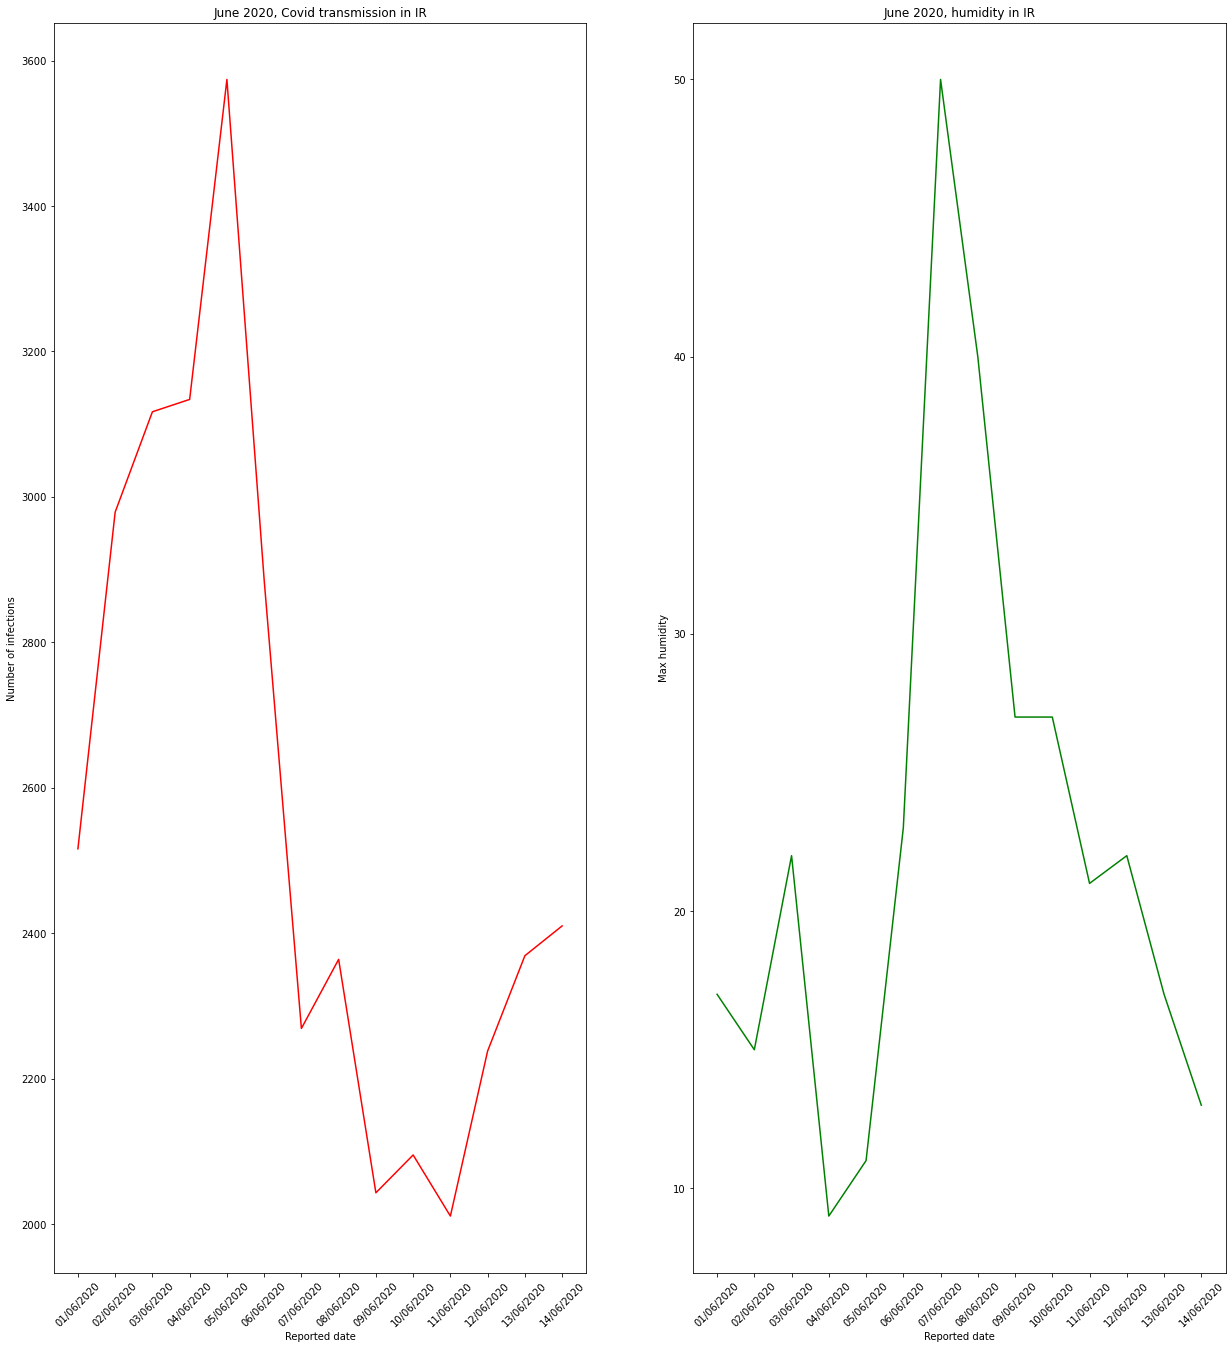

In [13]:
#Plot
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2)
plt.rcParams['figure.figsize'] = [21, 23]
ax1.plot(iran_2020_summer_sorted['dateRep'], iran_2020_summer_sorted['cases'], c='red')
ax1.set(xlabel='Reported date', ylabel='Number of infections',title='June 2020, Covid transmission in IR')
ax2.plot(weather_ir_june['dateRep'], weather_ir_june['maxHum'], c='green')
ax2.set(xlabel='Reported date', ylabel='Max humidity', title='June 2020, humidity in IR' )
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.show()

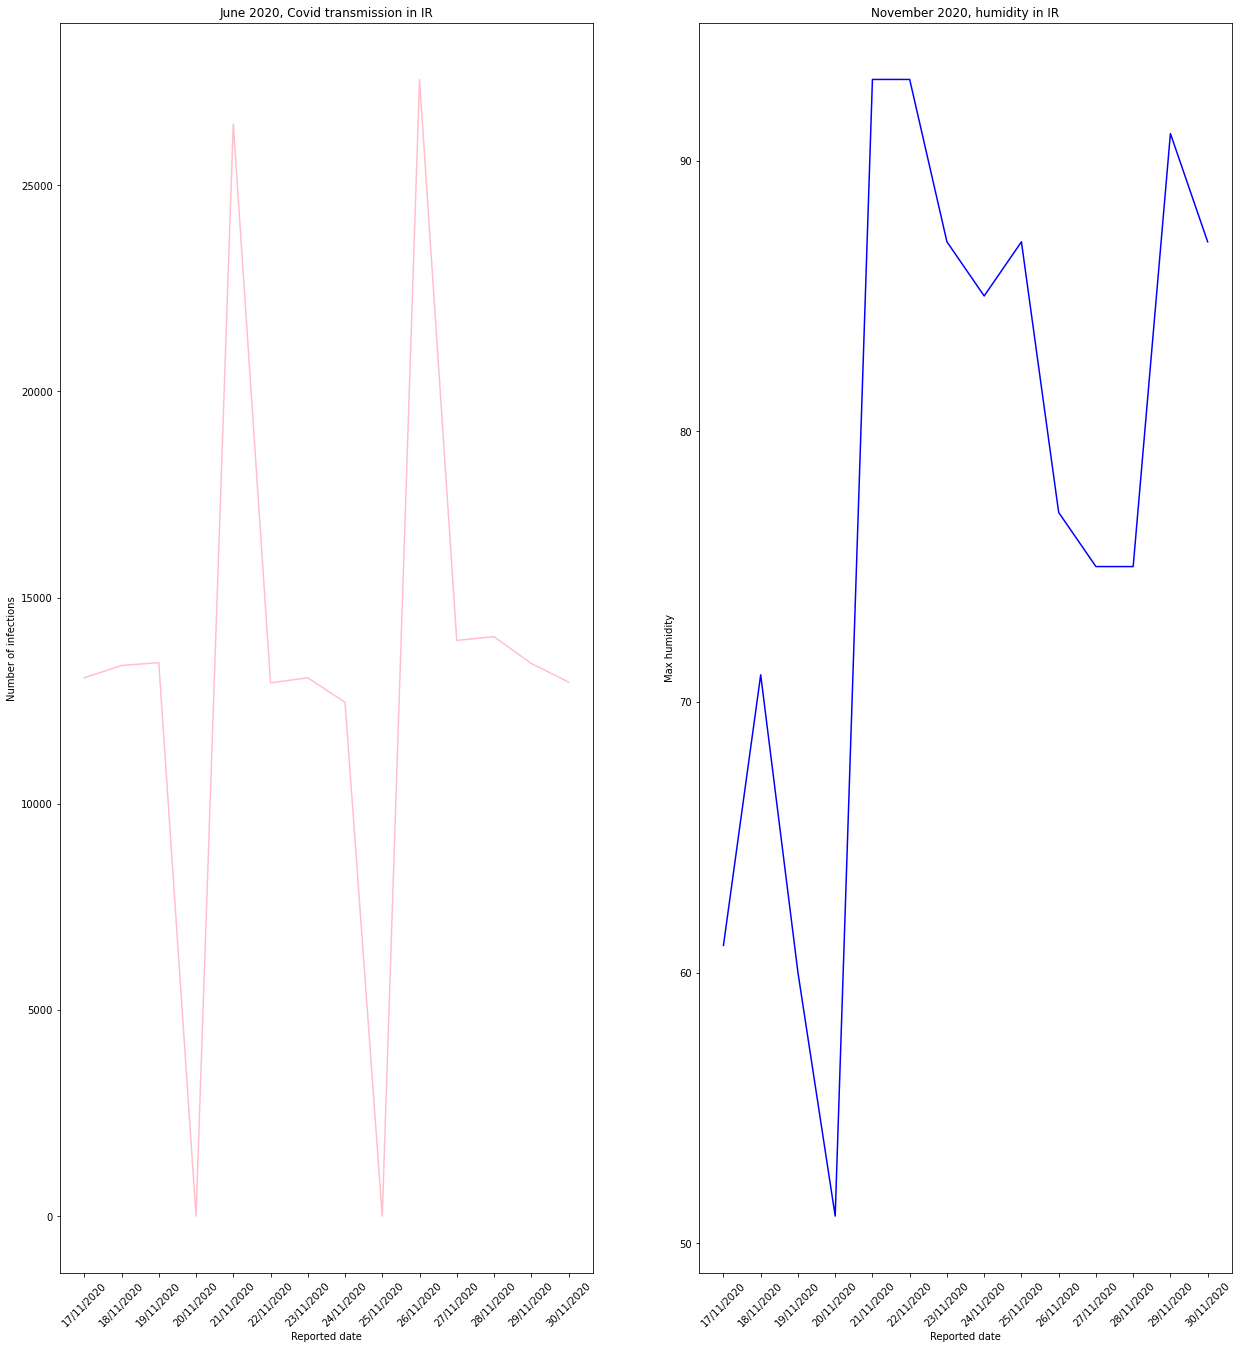

In [14]:
#Plot
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2)
plt.rcParams['figure.figsize'] = [21, 23]
ax1.plot(iran_2020_sorted['dateRep'], iran_2020_sorted['cases'], c='pink')
ax1.set(xlabel='Reported date', ylabel='Number of infections',title='June 2020, Covid transmission in IR')
ax2.plot(weather_ir_nov['dateRep'], weather_ir_nov['maxHum'], c='blue')
ax2.set(xlabel='Reported date', ylabel='Max humidity', title='November 2020, humidity in IR' )
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.show()